In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd())) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime, timedelta

from src.constants import HEADERS
from src.steps.ingest.process_data import ProcessData
from src.steps.transform.transform import TransformData

pd.set_option('display.max_columns', None)

In [2]:
DATA_DIR = '../data/'
lgl_path = os.path.join(DATA_DIR, 'df_logs.csv')
hustle_files = [f for f in os.listdir('../data') if f.startswith('df_hustle')]
hustle_paths = [os.path.join(DATA_DIR, f) for f in hustle_files]

# Read in Data
df_logs = pd.read_csv(lgl_path)
df_hustle_list = [pd.read_csv(f) for f in hustle_paths]
df_hustle = pd.concat(df_hustle_list)

In [3]:
neutral_game_ids = [22400147, 22401230, 22401229, 22400621, 22400633]
neutral_home_teams = ['WAS','OKC','ATL','IND','SAS']
neutral_dict = dict(zip(neutral_game_ids,neutral_home_teams))
    
proc_data = ProcessData(df_logs = df_logs, df_hustle=df_hustle, neutral_dict=neutral_dict)
df_proc = proc_data.process_data()

In [4]:
transform_data = TransformData(df_proc=df_proc)
df_trans = transform_data.engineered_features()

In [5]:
df_proc.head(2)

,SEASON_ID,GAME_ID,GAME_DATE,AWAY_TEAM_ID,HOME_TEAM_ID,AWAY_TEAM_ABBREVIATION,HOME_TEAM_ABBREVIATION,AWAY_TEAM_NAME,HOME_TEAM_NAME,AWAY_FGM,HOME_FGM,AWAY_FGA,HOME_FGA,AWAY_FG3M,HOME_FG3M,AWAY_FG3A,HOME_FG3A,AWAY_FTM,HOME_FTM,AWAY_FTA,HOME_FTA,AWAY_OREB,HOME_OREB,AWAY_DREB,HOME_DREB,AWAY_AST,HOME_AST,AWAY_STL,HOME_STL,AWAY_BLK,HOME_BLK,AWAY_TOV,HOME_TOV,AWAY_PF,HOME_PF,AWAY_PTS,HOME_PTS,NEUTRAL_IND,AWAY_BOX_OUT_PLAYER_REBS,HOME_BOX_OUT_PLAYER_REBS,AWAY_CHARGES_DRAWN,HOME_CHARGES_DRAWN,AWAY_SCREEN_AST_PTS,HOME_SCREEN_AST_PTS,AWAY_OFF_BOXOUTS,HOME_OFF_BOXOUTS,AWAY_CONTESTED_SHOTS,HOME_CONTESTED_SHOTS,AWAY_CONTESTED_SHOTS_3PT,HOME_CONTESTED_SHOTS_3PT,AWAY_BOX_OUTS,HOME_BOX_OUTS,AWAY_DEF_BOXOUTS,HOME_DEF_BOXOUTS,AWAY_SCREEN_ASSISTS,HOME_SCREEN_ASSISTS,AWAY_DEF_LOOSE_BALLS_RECOVERED,HOME_DEF_LOOSE_BALLS_RECOVERED,AWAY_LOOSE_BALLS_RECOVERED,HOME_LOOSE_BALLS_RECOVERED,AWAY_BOX_OUT_PLAYER_TEAM_REBS,HOME_BOX_OUT_PLAYER_TEAM_REBS,AWAY_OFF_LOOSE_BALLS_RECOVERED,HOME_OFF_LOOSE_BALLS_RECOVERED,AWAY_DEFLECTIONS,HOME_DEFLECTIONS,AWAY_CONTESTED_SHOTS_2PT,HOME_CONTESTED_SHOTS_2PT,HOME_POSS,AWAY_POSS,HOME_ORtg,AWAY_ORtg,HOME_NRtg,AWAY_NRtg,SCREEN_AST_PTS_DIFF,DEFLECTIONS_DIFF,CONTESTED_SHOTS_DIFF,DEF_BOXOUTS_DIFF,CONTESTED_SHOTS_2PT_DIFF,BOX_OUT_PLAYER_TEAM_REBS_DIFF,CHARGES_DRAWN_DIFF,LOOSE_BALLS_RECOVERED_DIFF,OFF_BOXOUTS_DIFF,BOX_OUTS_DIFF,DEF_LOOSE_BALLS_RECOVERED_DIFF,SCREEN_ASSISTS_DIFF,BOX_OUT_PLAYER_REBS_DIFF,OFF_LOOSE_BALLS_RECOVERED_DIFF,CONTESTED_SHOTS_3PT_DIFF
0,22022,22200001,2022-10-18,1610612755,1610612738,PHI,BOS,Philadelphia 76ers,Boston Celtics,40,46,80,82,13,12,34,35,24,22,28,28,4,6,27,30,16,24,8,8,3,3,14,11,25,24,117,126,0,4,0,0,2,19,22,0,0,27,34,12,15,6,2,6,2,9,10,1,2,1,4,6,2,0,2,16,16,15,19,99.32,102.32,126.862666,114.347146,12.515520,-12.515520,3,0,7,-4,4,-4,2,3,0,-4,1,1,-4,2,3
1,22022,22200002,2022-10-18,1610612747,1610612744,LAL,GSW,Los Angeles Lakers,Golden State Warriors,40,45,94,99,10,16,40,45,19,17,25,23,9,11,39,37,23,31,12,11,4,4,22,18,18,23,109,123,0,7,6,1,1,8,43,2,3,71,63,36,33,13,14,11,11,3,18,2,2,7,3,13,12,5,1,18,22,35,30,116.12,118.00,105.924905,92.372881,13.552024,-13.552024,35,4,-8,0,-5,-1,0,-4,1,1,0,15,-1,-4,-3


In [6]:
df_trans.head(2)

,SEASON_ID,GAME_ID,GAME_DATE,AWAY_TEAM_ID,HOME_TEAM_ID,AWAY_TEAM_ABBREVIATION,HOME_TEAM_ABBREVIATION,AWAY_TEAM_NAME,HOME_TEAM_NAME,AWAY_FGM,HOME_FGM,AWAY_FGA,HOME_FGA,AWAY_FG3M,HOME_FG3M,AWAY_FG3A,HOME_FG3A,AWAY_FTM,HOME_FTM,AWAY_FTA,HOME_FTA,AWAY_OREB,HOME_OREB,AWAY_DREB,HOME_DREB,AWAY_AST,HOME_AST,AWAY_STL,HOME_STL,AWAY_BLK,HOME_BLK,AWAY_TOV,HOME_TOV,AWAY_PF,HOME_PF,AWAY_PTS,HOME_PTS,NEUTRAL_IND,AWAY_BOX_OUT_PLAYER_REBS,HOME_BOX_OUT_PLAYER_REBS,AWAY_CHARGES_DRAWN,HOME_CHARGES_DRAWN,AWAY_SCREEN_AST_PTS,HOME_SCREEN_AST_PTS,AWAY_OFF_BOXOUTS,HOME_OFF_BOXOUTS,AWAY_CONTESTED_SHOTS,HOME_CONTESTED_SHOTS,AWAY_CONTESTED_SHOTS_3PT,HOME_CONTESTED_SHOTS_3PT,AWAY_BOX_OUTS,HOME_BOX_OUTS,AWAY_DEF_BOXOUTS,HOME_DEF_BOXOUTS,AWAY_SCREEN_ASSISTS,HOME_SCREEN_ASSISTS,AWAY_DEF_LOOSE_BALLS_RECOVERED,HOME_DEF_LOOSE_BALLS_RECOVERED,AWAY_LOOSE_BALLS_RECOVERED,HOME_LOOSE_BALLS_RECOVERED,AWAY_BOX_OUT_PLAYER_TEAM_REBS,HOME_BOX_OUT_PLAYER_TEAM_REBS,AWAY_OFF_LOOSE_BALLS_RECOVERED,HOME_OFF_LOOSE_BALLS_RECOVERED,AWAY_DEFLECTIONS,HOME_DEFLECTIONS,AWAY_CONTESTED_SHOTS_2PT,HOME_CONTESTED_SHOTS_2PT,HOME_POSS,AWAY_POSS,HOME_ORtg,AWAY_ORtg,HOME_NRtg,AWAY_NRtg,SCREEN_AST_PTS_DIFF,DEFLECTIONS_DIFF,CONTESTED_SHOTS_DIFF,DEF_BOXOUTS_DIFF,CONTESTED_SHOTS_2PT_DIFF,BOX_OUT_PLAYER_TEAM_REBS_DIFF,CHARGES_DRAWN_DIFF,LOOSE_BALLS_RECOVERED_DIFF,OFF_BOXOUTS_DIFF,BOX_OUTS_DIFF,DEF_LOOSE_BALLS_RECOVERED_DIFF,SCREEN_ASSISTS_DIFF,BOX_OUT_PLAYER_REBS_DIFF,OFF_LOOSE_BALLS_RECOVERED_DIFF,CONTESTED_SHOTS_3PT_DIFF
0,22022,22200001,2022-10-18,1610612755,1610612738,PHI,BOS,Philadelphia 76ers,Boston Celtics,40,46,80,82,13,12,34,35,24,22,28,28,4,6,27,30,16,24,8,8,3,3,14,11,25,24,117,126,0,4,0,0,2,19,22,0,0,27,34,12,15,6,2,6,2,9,10,1,2,1,4,6,2,0,2,16,16,15,19,99.32,102.32,126.862666,114.347146,12.515520,-12.515520,3,0,7,-4,4,-4,2,3,0,-4,1,1,-4,2,3
1,22022,22200002,2022-10-18,1610612747,1610612744,LAL,GSW,Los Angeles Lakers,Golden State Warriors,40,45,94,99,10,16,40,45,19,17,25,23,9,11,39,37,23,31,12,11,4,4,22,18,18,23,109,123,0,7,6,1,1,8,43,2,3,71,63,36,33,13,14,11,11,3,18,2,2,7,3,13,12,5,1,18,22,35,30,116.12,118.00,105.924905,92.372881,13.552024,-13.552024,35,4,-8,0,-5,-1,0,-4,1,1,0,15,-1,-4,-3


In [11]:
def rmse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)**.5

In [81]:
def estimate_stage1_model(X: pd.DataFrame, y: pd.Series) -> sm.OLS:
    
    # Fit Model
    X1 = sm.add_constant(X)
    reg = sm.OLS(endog=y, exog=X1).fit()
    print(reg.summary())

    # Estimate RMSE
    yhat = reg.fittedvalues
    print(f"\n\nIn-Sample RMSE: {rmse(y, yhat): .3f}\n\n")

    # Summary Plot
    fig, ax = plt.subplots(2,3, figsize=(20,10))
    sns.regplot(x=y, y=yhat, line_kws={'color': 'red', 'label':'Linear Model'}, scatter_kws={'color': 'tab:blue','alpha':.25},ax=ax[0,0])
    sns.regplot(x=y, y=yhat, lowess=True, line_kws={'color': 'green', 'label':'Lowess Model'}, scatter_kws={'color':'blue', 'alpha':0}, ax=ax[0,0])
    ax[0,0].set_ylabel('Estimated NRtg')
    ax[0,0].legend(loc='best')

    # Diagnostic Plots
    sns.scatterplot(x=yhat, y=reg.resid, alpha=.5, ax=ax[0,1])
    ax[0,1].axhline(y=0, color='red',linestyle='dashed')
    ax[0,1].set_ylabel('Residual')
    ax[0,1].set_xlabel('Predicted NRtg')

    sm.qqplot(reg.resid, line='q', ax=ax[0,2])

    # Error Analysis
    df_res = pd.DataFrame(
        {
            'yhat': yhat,
            'y': reg.model.endog,
            'resid': reg.resid,
            'abs_resid': abs(reg.resid)
        }
    )
    df_res['yhat_bin'] = pd.qcut(df_res['yhat'], q=10)
    df_res['y_bin'] = pd.qcut(df_res['y'], q=10)
    y_mean_per_yhat_bin = df_res.groupby('yhat_bin', observed=True)['y'].mean()
    yhat_mean_per_y_bin = df_res.groupby('y_bin', observed=True)['yhat'].mean()
    
    resid_mean_per_yhat_bin = df_res.groupby('yhat_bin', observed=True)['resid'].mean()
    resid_mean_per_y_bin = df_res.groupby('y_bin', observed=True)['resid'].mean()
    
    abs_resid_mean_per_yhat_bin = df_res.groupby('yhat_bin', observed=True)['abs_resid'].mean()
    abs_resid_mean_per_y_bin = df_res.groupby('y_bin', observed=True)['abs_resid'].mean()
    
    
    sns.lineplot(x=range(1,11), y=y_mean_per_yhat_bin, label='Avg Y Per Yhat Bin', ax=ax[1,0])
    sns.lineplot(x=range(1,11), y=yhat_mean_per_y_bin, label='Avg Yhat Per Y Bin', ax=ax[1,0])
    ax[1,0].legend(loc='best')
    #plt.show()
    
    sns.lineplot(x=range(1,11), y=resid_mean_per_yhat_bin, label='Avg Residual Per Yhat Bin', ax=ax[1,1])
    sns.lineplot(x=range(1,11), y=resid_mean_per_y_bin, label='Avg Residual Per Y Bin', ax=ax[1,1])
    ax[1,1].legend(loc='best')
    #plt.show()
    
    sns.lineplot(x=range(1,11), y=abs_resid_mean_per_yhat_bin, label='Avg Abs. Residual Per Yhat Bin', ax=ax[1,2])
    sns.lineplot(x=range(1,11), y=abs_resid_mean_per_y_bin, label='Avg Abs. Residual Per Y Bin', ax=ax[1,2])
    ax[1,2].legend(loc='best')
    #plt.show()
    

    return reg
    

In [8]:
from scipy import stats

In [83]:
def estimate_composite_effort(X: pd.DataFrame, y: pd.Series, reg: sm.OLS):
    X = X.copy()
    
    # Create composite effort 
    effort_vec = np.array(reg.params[1:]).reshape((-1,1))
    effort_mat = np.array(X)
    X['COMPOSITE_EFFORT'] = effort_mat @ effort_vec

    # Plots
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    sns.histplot(X['COMPOSITE_EFFORT'], ax=ax[0])
    sns.ecdfplot(X['COMPOSITE_EFFORT'], ax=ax[1])
    sns.scatterplot(x=X['COMPOSITE_EFFORT'], y=y, ax=ax[2])

    # Distribution
    percentiles = [.001,.01,.05,.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95,.99,.999]
    print(X['COMPOSITE_EFFORT'].describe(percentiles))

    # Correlations
    pearson = stats.pearsonr(X['COMPOSITE_EFFORT'],y)
    spearman = stats.spearmanr(X['COMPOSITE_EFFORT'],y)
    kendall = stats.kendalltau(X['COMPOSITE_EFFORT'],y)
    print(f"\n\nPearson Correlation: {float(pearson[0]): .3f}, P-value: {pearson[1]: .5f}")
    print(f"Spearman Correlation: {float(spearman[0]): .3f}, P-value: {spearman[1]: .5f}")
    print(f"Kendall's Tau Correlation: {float(kendall[0]): .3f}, P-value: {kendall[1]: .5f}")
    #print(f"Xi Correlation: {stats.chatterjeexi(X['COMPOSITE_EFFORT'],y): .3f}")

    return X

In [25]:
hs

['SCREEN_AST_PTS',
 'DEFLECTIONS',
 'CONTESTED_SHOTS',
 'DEF_BOXOUTS',
 'CONTESTED_SHOTS_2PT',
 'BOX_OUT_PLAYER_TEAM_REBS',
 'CHARGES_DRAWN',
 'LOOSE_BALLS_RECOVERED',
 'OFF_BOXOUTS',
 'BOX_OUTS',
 'DEF_LOOSE_BALLS_RECOVERED',
 'SCREEN_ASSISTS',
 'BOX_OUT_PLAYER_REBS',
 'OFF_LOOSE_BALLS_RECOVERED',
 'CONTESTED_SHOTS_3PT']

In [13]:
others = ['DEFLECTIONS', 'CHARGES_DRAWN']
contested_shots = ['CONTESTED_SHOTS_2PT','CONTESTED_SHOTS_3PT']
screen_ast = ['SCREEN_ASSISTS']
loose_balls = ['OFF_LOOSE_BALLS_RECOVERED','DEF_LOOSE_BALLS_RECOVERED']
boxouts = ['OFF_BOXOUTS','DEF_BOXOUTS']

hustle_features = contested_shots + screen_ast + loose_balls + boxouts + others
home_hustle_feat = [f"HOME_{feat}" for feat in hustle_features]
away_hustle_feat = [f"AWAY_{feat}" for feat in hustle_features]

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5.980
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.42e-13
Time:                        12:50:16   Log-Likelihood:                -2251.9
No. Observations:                 575   AIC:                             4542.
Df Residuals:                     556   BIC:                             4624.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

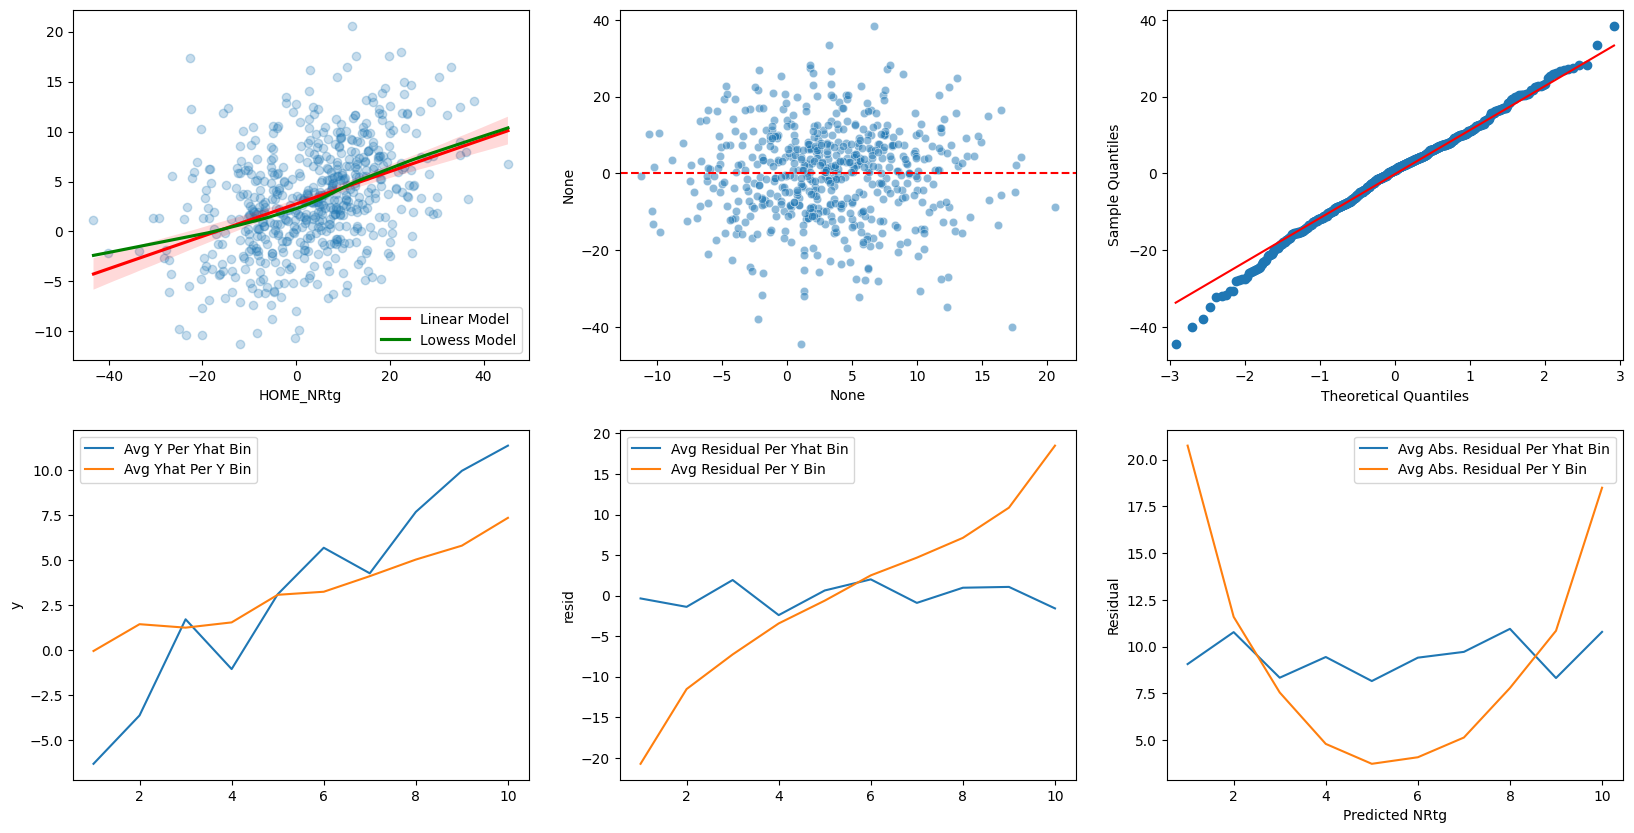

In [82]:
reg1 = estimate_stage1_model(X=df_trans[home_hustle_feat + away_hustle_feat], y=df_trans['HOME_NRtg'])

count    575.000000
mean      -2.359284
std        5.350828
min      -16.900085
0.1%     -16.548443
1%       -15.454237
5%       -10.970915
10%       -9.293633
20%       -6.774476
25%       -5.788882
30%       -5.056424
40%       -3.718243
50%       -2.535766
60%       -1.323113
70%        0.248720
75%        0.994090
80%        1.884690
90%        4.685569
95%        6.631251
99%       10.822938
99.9%     13.457588
max       14.963169
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.403, P-value:  0.00000
Spearman Correlation:  0.406, P-value:  0.00000
Kendall's Tau Correlation:  0.281, P-value:  0.00000


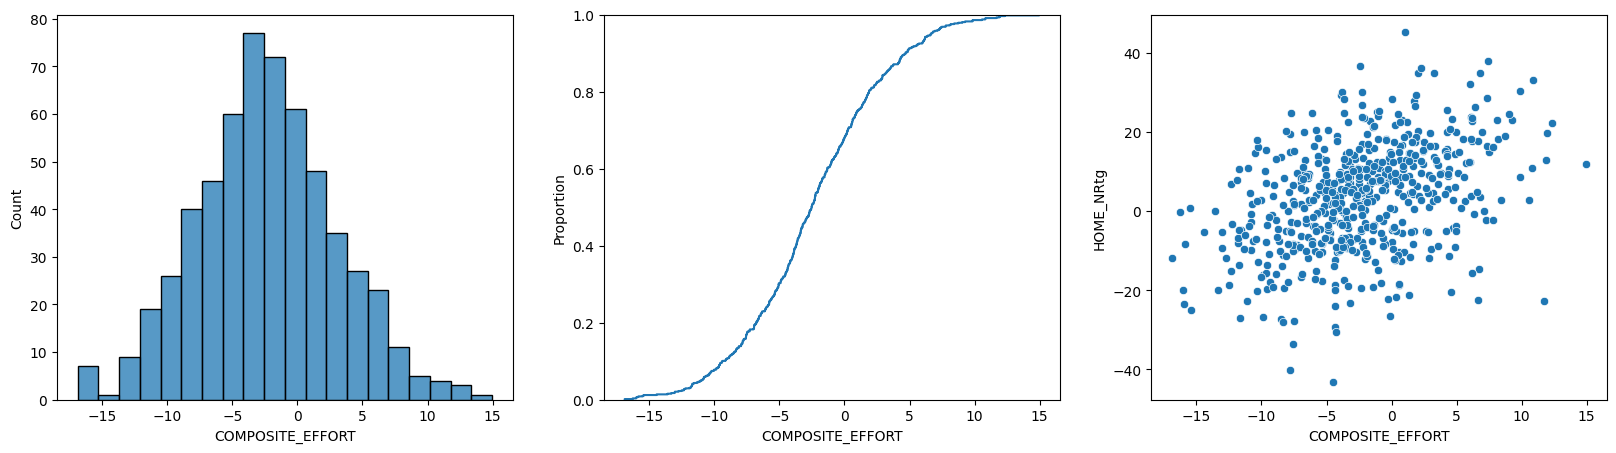

In [84]:
X = estimate_composite_effort(X=df_trans[home_hustle_feat + away_hustle_feat], y=df_trans['HOME_NRtg'], reg=reg1)

In [89]:
hustle_diff_features = [f"{feat}_DIFF" for feat in hustle_features]
hustle_diff_features

['CONTESTED_SHOTS_2PT_DIFF',
 'CONTESTED_SHOTS_3PT_DIFF',
 'SCREEN_ASSISTS_DIFF',
 'OFF_LOOSE_BALLS_RECOVERED_DIFF',
 'DEF_LOOSE_BALLS_RECOVERED_DIFF',
 'OFF_BOXOUTS_DIFF',
 'DEF_BOXOUTS_DIFF',
 'DEFLECTIONS_DIFF',
 'CHARGES_DRAWN_DIFF']

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     10.92
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           9.35e-16
Time:                        12:57:26   Log-Likelihood:                -2256.6
No. Observations:                 575   AIC:                             4533.
Df Residuals:                     565   BIC:                             4577.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

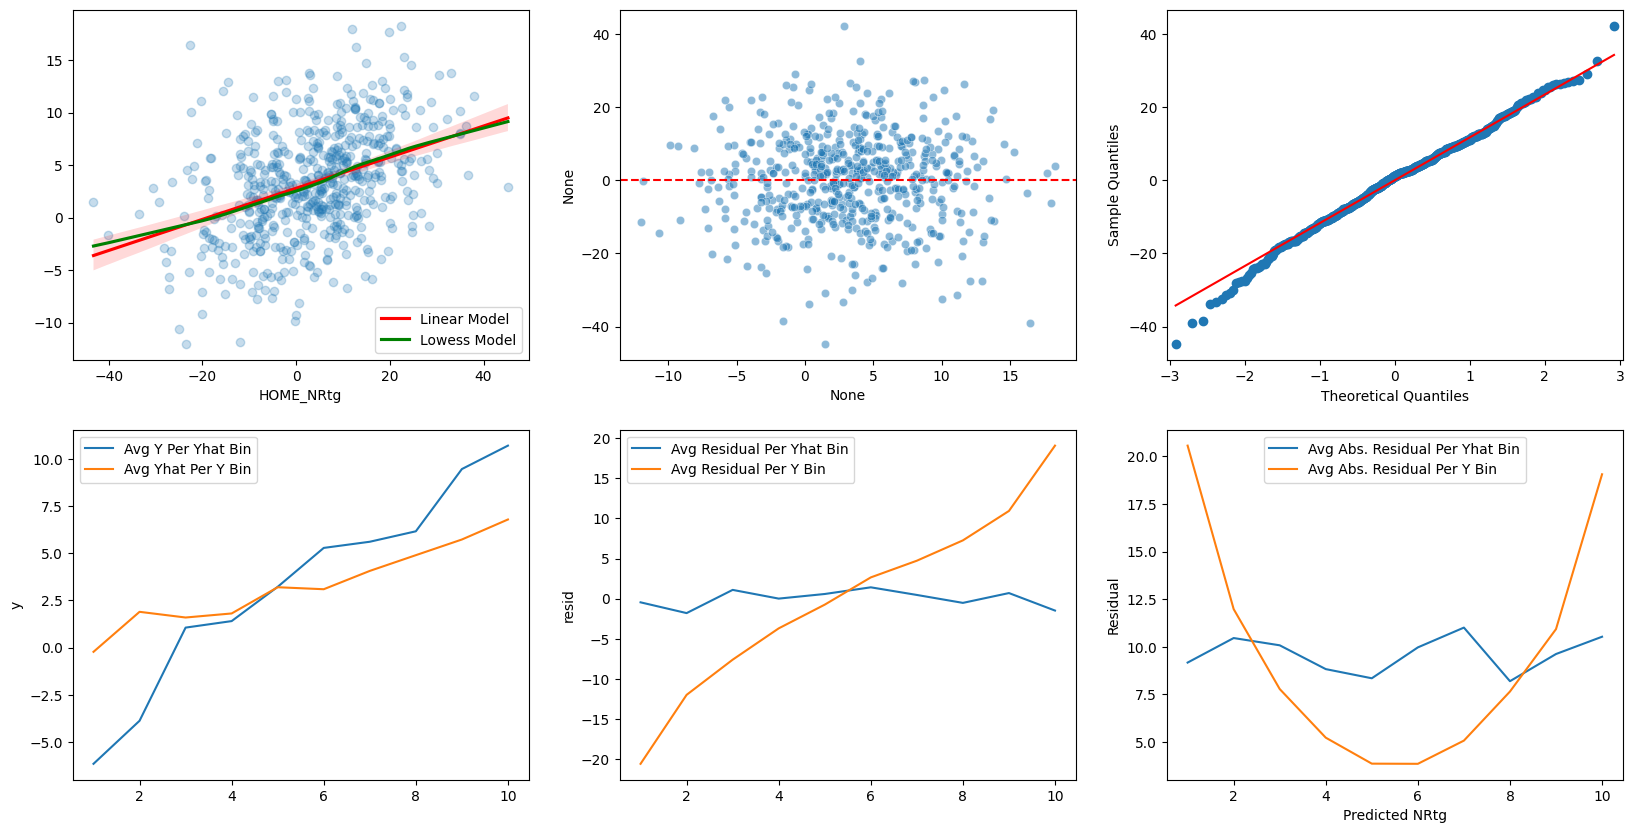

In [90]:
reg2 = estimate_stage1_model(X=df_trans[hustle_diff_features], y=df_trans['HOME_NRtg'])

count    575.000000
mean       0.492987
std        5.115178
min      -14.817985
0.1%     -14.724412
1%       -11.202517
5%        -8.135900
10%       -5.984244
20%       -3.782297
25%       -2.676109
30%       -2.051305
40%       -0.773566
50%        0.539753
60%        1.643885
70%        2.994067
75%        3.967328
80%        4.947571
90%        7.202034
95%        8.736457
99%       12.059803
99.9%     15.326439
max       15.501292
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.385, P-value:  0.00000
Spearman Correlation:  0.384, P-value:  0.00000
Kendall's Tau Correlation:  0.265, P-value:  0.00000


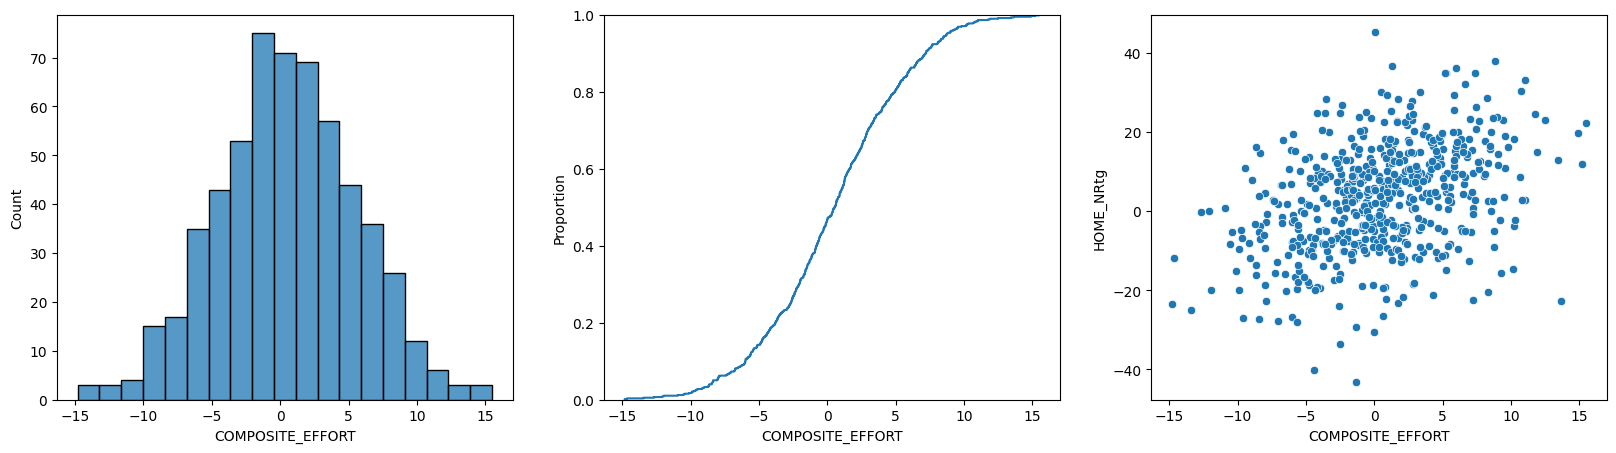

In [91]:
X = estimate_composite_effort(X=df_trans[hustle_diff_features], y=df_trans['HOME_NRtg'], reg=reg2)